In [5]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [6]:
from clustering import Kmeans, preprocess_features

ModuleNotFoundError: No module named 'faiss'

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import faiss

ModuleNotFoundError: No module named 'faiss'

In [8]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline

## 准备数据

In [9]:
# # gpu
# x = torch.rand((500, 2)).cuda().cpu().numpy()
# logits = torch.rand((10, 2)).cuda()

In [10]:
# cpu
x = torch.rand((512, 128))
logits = torch.rand((512, 10))

In [11]:
x_np = x.numpy()

## 进行聚类

In [8]:
n_clusts = 3
n_feats = 64

In [9]:
my_clust = Kmeans(n_clusts, n_feats)

In [10]:
my_clust.cluster(x_np, verbose=True)

k-means loss evolution: [918.43994141 502.65664673 502.17852783 501.7755127  501.54779053
 501.40576172 501.30322266 501.23013306 501.20251465 501.16583252
 501.15313721 501.14138794 501.14138794 501.14138794 501.14138794
 501.14138794 501.14138794 501.14138794 501.14138794 501.14138794]
k-means time: 6 s


501.1413879394531

In [11]:
type(my_clust.images_lists), len(my_clust.images_lists)

(list, 3)

## 获取标签

In [12]:
pseudolabels = []
image_indexes = []
for cluster, images in enumerate(my_clust.images_lists):
    image_indexes.extend(images)
    pseudolabels.extend([cluster] * len(images))

In [13]:
type(image_indexes), len(image_indexes)

(list, 512)

In [14]:
n_clusts == len(my_clust.images_lists)

True

**testing begin**

In [15]:
image_indexes[:10]
sorted(image_indexes)[:10]
image_indexes[:10]

[2, 3, 5, 7, 10, 11, 12, 13, 15, 17]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[2, 3, 5, 7, 10, 11, 12, 13, 15, 17]

In [16]:
pseudolabels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**testing End**

In [17]:
# decorated = zip(pseudolabels, image_indexes)
# decorated.sort(key=lambda v: v[1])
# new_pseudo = [v[0] for v in decorated]

# new_list1 = [v[0] for v in sorted(zip(pseudolabels, image_indexes), key=lambda v: (v[1], -v[2]))]
new_pseudo = [v[0] for v in sorted(zip(pseudolabels, image_indexes), key=lambda v: v[1])]

In [18]:
new_pseudo[:10]

[2, 2, 0, 0, 1, 0, 2, 0, 1, 2]

**Test Order**

In [56]:
# testing 
k_index = 5
res_i = image_indexes.index(k_index)
pseudolabels[res_i]

2

**Test End**

**New_pseduo 就是我们想要的结果**

## onehot 编码

.cpu().numpy()

In [81]:
torch.tensor(new_pseudo)

tensor([2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1,
        2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2,
        1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0,
        0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2,
        0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0,
        2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2,
        2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1,
        2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2,
        0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1,
        0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0,
        2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1,

In [85]:
tmp_pseudo = torch.nn.functional.one_hot(torch.tensor(new_pseudo), num_classes=n_clusts).float()
tmp_pseudo

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [86]:
tmp_pseudo.dtype

torch.float32

In [22]:
ts_pseudo = torch.Tensor(new_pseudo).long()
ts_pseudo.type()

'torch.LongTensor'

In [24]:
pseudo_onehot = torch.nn.functional.one_hot(ts_pseudo, num_classes=n_clusts)
pseudo_onehot

tensor([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0]])

In [25]:
new_pseudo[:10]

[2, 2, 0, 0, 1, 0, 2, 0, 1, 2]

## 获取每个cluster的分布

In [93]:
max_probs, max_idx = torch.max(logits, dim=-1)
mask_bool = max_probs.ge(0.8)
mask = mask_bool.float()

In [96]:
mask_bool

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [98]:
ttt_thred = mask_bool[my_clust.images_lists[0]]
ttt_thred

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True, False,  True,
         True,  True, False,  True, False,  True,  True,  True, False,  True,
        False,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True, False,  True,  True, 

In [99]:
ttt_thred.shape

torch.Size([167])

In [87]:
ttt = logits[my_clust.images_lists[0]]
ttt

tensor([[0.5203, 0.3800, 0.6930,  ..., 0.5097, 0.5640, 0.5433],
        [0.6966, 0.2798, 0.7561,  ..., 0.3899, 0.1410, 0.2933],
        [0.3881, 0.1685, 0.8652,  ..., 0.0659, 0.7034, 0.5383],
        ...,
        [0.0401, 0.6058, 0.2933,  ..., 0.6993, 0.5208, 0.1563],
        [0.4437, 0.0201, 0.3585,  ..., 0.5548, 0.9764, 0.7142],
        [0.5149, 0.0800, 0.9422,  ..., 0.2936, 0.2529, 0.2217]])

In [88]:
ttt.shape

torch.Size([167, 10])

In [100]:
ttt_final = ttt[ttt_thred]
ttt_final

tensor([[0.5203, 0.3800, 0.6930,  ..., 0.5097, 0.5640, 0.5433],
        [0.6966, 0.2798, 0.7561,  ..., 0.3899, 0.1410, 0.2933],
        [0.3881, 0.1685, 0.8652,  ..., 0.0659, 0.7034, 0.5383],
        ...,
        [0.0401, 0.6058, 0.2933,  ..., 0.6993, 0.5208, 0.1563],
        [0.4437, 0.0201, 0.3585,  ..., 0.5548, 0.9764, 0.7142],
        [0.5149, 0.0800, 0.9422,  ..., 0.2936, 0.2529, 0.2217]])

In [101]:
ttt_final.shape

torch.Size([150, 10])

In [30]:
ttt.mean(0)

tensor([0.5114, 0.4979, 0.4832, 0.5391, 0.5177, 0.4816, 0.5068, 0.4815, 0.4938,
        0.5001])

In [26]:
len(my_clust.images_lists[0])

172

**计算分布**

In [ ]:
logits

In [102]:
clust_dist = []
for each in my_clust.images_lists:
    tmp_dist = logits[each]
    clust_dist.append(tmp_dist.mean(0))

In [103]:
clust_dist

[tensor([0.5114, 0.4979, 0.4832, 0.5391, 0.5177, 0.4816, 0.5068, 0.4815, 0.4938,
         0.5001]),
 tensor([0.4863, 0.5034, 0.4815, 0.4905, 0.4931, 0.4901, 0.5181, 0.4940, 0.4849,
         0.5244]),
 tensor([0.5101, 0.5151, 0.4557, 0.5107, 0.4979, 0.4648, 0.5089, 0.4669, 0.5367,
         0.4968])]

In [104]:
dists = torch.stack(clust_dist)

In [105]:
dists

tensor([[0.5114, 0.4979, 0.4832, 0.5391, 0.5177, 0.4816, 0.5068, 0.4815, 0.4938,
         0.5001],
        [0.4863, 0.5034, 0.4815, 0.4905, 0.4931, 0.4901, 0.5181, 0.4940, 0.4849,
         0.5244],
        [0.5101, 0.5151, 0.4557, 0.5107, 0.4979, 0.4648, 0.5089, 0.4669, 0.5367,
         0.4968]])

In [106]:
del clust_dist

In [107]:
dists

tensor([[0.5114, 0.4979, 0.4832, 0.5391, 0.5177, 0.4816, 0.5068, 0.4815, 0.4938,
         0.5001],
        [0.4863, 0.5034, 0.4815, 0.4905, 0.4931, 0.4901, 0.5181, 0.4940, 0.4849,
         0.5244],
        [0.5101, 0.5151, 0.4557, 0.5107, 0.4979, 0.4648, 0.5089, 0.4669, 0.5367,
         0.4968]])

In [53]:
dists.shape

torch.Size([3, 10])

In [54]:
dists.dtype

torch.float32

## 计算loss

In [55]:
logits.shape

torch.Size([512, 10])

In [56]:
dists.shape

torch.Size([3, 10])

In [60]:
pseudo_onehot.shape

torch.Size([512, 3])

**1) get sim**

In [62]:
temperature = 1.0

In [63]:
sim = torch.mm(logits, dists.t()/temperature)
sim.shape

torch.Size([512, 3])

In [64]:
sim

tensor([[3.2368, 3.1970, 3.2139],
        [2.9974, 2.9191, 2.9857],
        [2.5447, 2.5065, 2.5144],
        ...,
        [2.4053, 2.3437, 2.3390],
        [2.8243, 2.7902, 2.8342],
        [2.9996, 2.9697, 2.9851]])

**2) norm**

In [65]:
sim_probs = sim / sim.sum(1, keepdim=True)

In [66]:
sim_probs.shape

torch.Size([512, 3])

In [67]:
sim_probs.dtype

torch.float32

In [68]:
sim_probs

tensor([[0.3355, 0.3314, 0.3331],
        [0.3367, 0.3279, 0.3354],
        [0.3364, 0.3313, 0.3323],
        ...,
        [0.3393, 0.3307, 0.3300],
        [0.3343, 0.3303, 0.3355],
        [0.3350, 0.3316, 0.3334]])

**3) only select choose**

In [75]:
# check sum=1
pseudo_onehot.shape
pseudo_onehot.sum(dim=-1).sum() == 512

torch.Size([512, 3])

tensor(True)

In [76]:
loss_c = - (torch.log(sim_probs + 1e-6) * pseudo_onehot.float()).sum(1)
loss_c = loss_c.mean()

In [77]:
loss_c

tensor(1.0980)

## test rampup

In [12]:
def exp_rampup(rampup_length):
    """Exponential rampup from https://arxiv.org/abs/1610.02242"""
    def warpper(epoch):
        if epoch < rampup_length:
            epoch = np.clip(epoch, 0.0, rampup_length)
            phase = 1.0 - epoch / rampup_length
            return float(np.exp(-5.0 * phase * phase))
        else:
            return 1.0
    return warpper


def linear_rampup(rampup_length):
    """Linear rampup"""
    def warpper(epoch):
        if epoch < rampup_length:
            return epoch / rampup_length
        else:
            return 1.0
    return warpper

In [21]:
min_k = 3
max_k = 10
n_iter = 1000
rampup_ratio = 0.5

func_ramp_exp = exp_rampup(int(n_iter*rampup_ratio))
func_ramp_linear = linear_rampup(int(n_iter*rampup_ratio))

In [42]:
x_index = range(n_iter)
y_exp = [min_k + np.floor((max_k - min_k) * func_ramp_exp(x)) for x in range(n_iter)]
y_linear = [min_k + np.floor((max_k - min_k) * func_ramp_linear(x)) for x in range(n_iter)]
y_linear_arr = np.array(y_linear, dtype=np.int)
y_exp_arr = np.array(y_exp, dtype=np.int)

In [49]:
ax_lst_linear = []
ax_lst_exp = []
for x in range(min_k, max_k+1):
    ax_lst_linear.append(np.where(y_linear_arr==x)[0][0])
    ax_lst_exp.append(np.where(y_exp_arr==x)[0][0])
ax_lst = set.union(set(ax_lst_linear),set(ax_lst_exp))
ax_lst = list(ax_lst)
ax_lst.sort()
ax_lst

[0, 72, 143, 189, 215, 250, 286, 295, 333, 358, 371, 413, 429, 500]

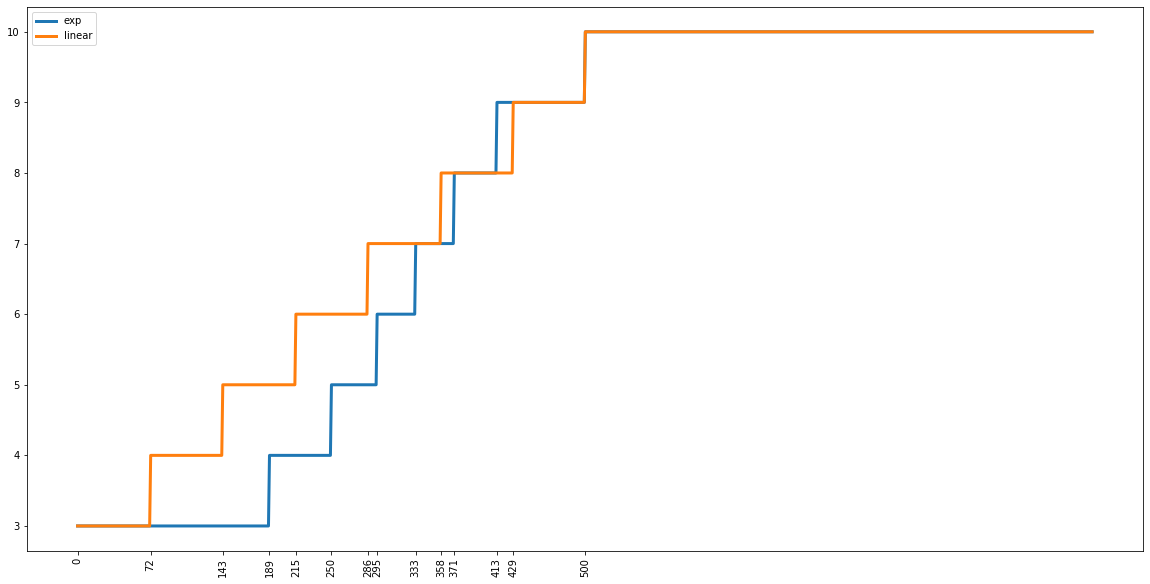

In [63]:
plt.figure(figsize=(20,10))
plt.plot(x_index, y_exp, linewidth=3, label="exp")
plt.plot(x_index, y_linear, linewidth=3,label="linear")
plt.xticks(ax_lst, ax_lst, rotation=90)
plt.legend();

[0, 72, 143, 189, 215, 250, 286, 295, 333, 358, 371, 413, 429, 500]

In [1]:
import numpy as np

In [ ]:
np.max()